In [3]:
# utilities
import re
import pandas as pd

# plotting
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

In [4]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

dataset = pd.read_csv(
    'training.1600000.processed.noemoticon.csv',
    encoding=DATASET_ENCODING,
    names=DATASET_COLUMNS
)

print("Original dataset shape:", dataset.shape)
dataset.head()


Original dataset shape: (1600000, 6)


,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Keep only required columns
dataset = dataset[['sentiment', 'text']]

print("Sentiment distribution:")
dataset['sentiment'].value_counts()


Sentiment distribution:


sentiment
0    800000
4    800000
Name: count, dtype: int64

In [6]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


In [7]:
def preprocess(textdata):
    processedText = []
    
    wordLemm = WordNetLemmatizer()
    
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace URLs
        tweet = re.sub(urlPattern,' URL',tweet)
        
        # Replace emojis
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        
        # Replace usernames
        tweet = re.sub(userPattern,' USER', tweet)
        
        # Remove special characters
        tweet = re.sub(alphaPattern, " ", tweet)
        
        # Reduce repeated characters
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word) > 1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word + ' ')
            
        processedText.append(tweetwords)
        
    return processedText


In [8]:
processedtext = preprocess(dataset['text'])
dataset['processed_text'] = processedtext

print("Processed text sample:")
dataset[['sentiment', 'processed_text']].head()


Processed text sample:


,sentiment,processed_text
0,0,USER URL aww that bummer you shoulda got david...
1,0,is upset that he can update his facebook by te...
2,0,USER dived many time for the ball managed to s...
3,0,my whole body feel itchy and like it on fire
4,0,USER no it not behaving at all mad why am here...


In [9]:
# Split by sentiment
neg_text = dataset[dataset['sentiment'] == 0]['processed_text']
pos_text = dataset[dataset['sentiment'] == 4]['processed_text']

print("Number of Negative samples:", len(neg_text))
print("Number of Positive samples:", len(pos_text))

# Sampling 
neg_sample = neg_text.sample(n=5000, random_state=42)
pos_sample = pos_text.sample(n=5000, random_state=42)

print("\nAfter sampling:")
print("Negative sample size:", len(neg_sample))
print("Positive sample size:", len(pos_sample))


Number of Negative samples: 800000
Number of Positive samples: 800000

After sampling:
Negative sample size: 5000
Positive sample size: 5000


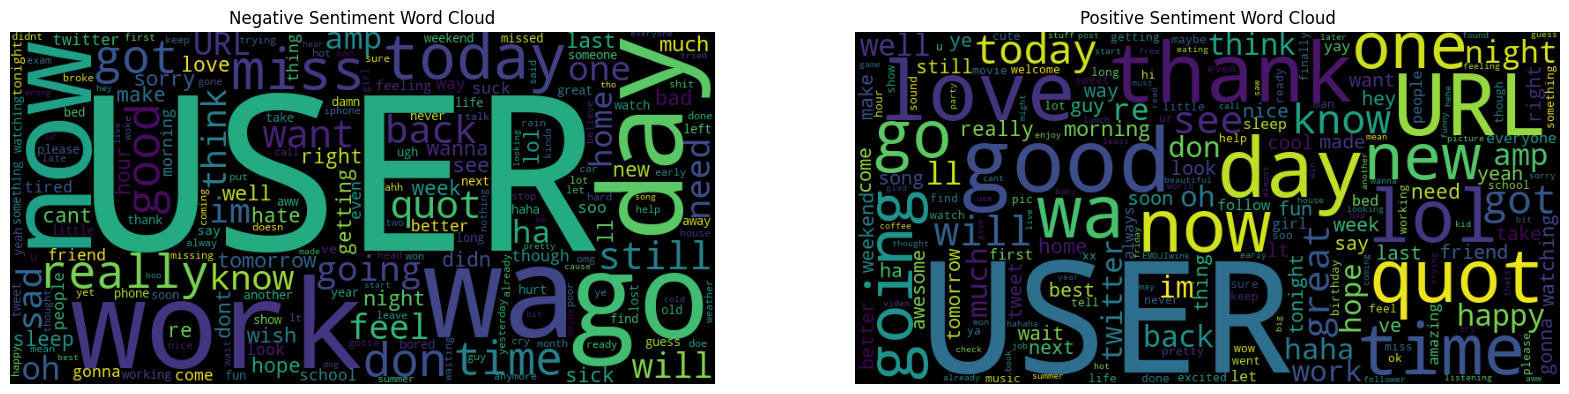

In [10]:
neg_words = " ".join(neg_sample)
pos_words = " ".join(pos_sample)

wc_neg = WordCloud(
    max_words=200,
    width=800,
    height=400,
    collocations=False
).generate(neg_words)

wc_pos = WordCloud(
    max_words=200,
    width=800,
    height=400,
    collocations=False
).generate(pos_words)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wc_neg)
axes[0].set_title("Negative Sentiment Word Cloud")
axes[0].axis("off")

axes[1].imshow(wc_pos)
axes[1].set_title("Positive Sentiment Word Cloud")
axes[1].axis("off")

plt.show()
